## Distance and Distance Matrix



### 1.Take two 3D coordinates from the user. Find out the distance between these pointsusing following distance functions. x and y are vectors representing the coordinates of two points. Here, k=3

In [9]:
import math
import random

def euclidean_distance(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

def manhattan_distance(x1, y1, z1, x2, y2, z2):
    return abs(x2 - x1) + abs(y2 - y1) + abs(z2 - z1)

def minkowski_distance(x1, y1, z1, x2, y2, z2, p):
    return ((abs(x2 - x1))**p + (abs(y2 - y1))**p + (abs(z2 - z1))**p)**(1/p)

# To Generate Random 3D Coordinates
x1, y1, z1 = random.uniform(0, 10), random.uniform(0, 10), random.uniform(0, 10)
x2, y2, z2 = random.uniform(0, 10), random.uniform(0, 10), random.uniform(0, 10)

euclidean_dist = euclidean_distance(x1, y1, z1, x2, y2, z2)
manhattan_dist = manhattan_distance(x1, y1, z1, x2, y2, z2)
minkowski_dist = minkowski_distance(x1, y1, z1, x2, y2, z2, 3)  # k=3 for 3D coordinates

print("Coordinates of first point (x1 y1 z1):", x1, y1, z1)
print("Coordinates of second point (x2 y2 z2):", x2, y2, z2)
print("Euclidean distance:", euclidean_dist)
print("Manhattan distance:", manhattan_dist)
print("Minkowski distance (k=3):", minkowski_dist)

Coordinates of first point (x1 y1 z1): 8.215550872392622 9.958521615957174 4.851844500740052
Coordinates of second point (x2 y2 z2): 2.1407715156652563 8.529716365474197 0.2598082114207001
Euclidean distance: 7.747982057229774
Manhattan distance: 12.095620896529695
Minkowski distance (k=3): 6.867758746512823


### 2.Import the Iris dataset. Write a program to obtain the Euclidian Distance Matrix for all the data samples in the feature space. Distance metric is a 2D array, where the (i,j)th entry represents the distance between the ith and jth sample points in the featurespace.

In [10]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def euclidean_distance_matrix(data):
    num_samples = len(data)
    distance_matrix = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(num_samples):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
    return distance_matrix

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data

distance_matrix = euclidean_distance_matrix(data)

print("Euclidean Distance Matrix:")
print(distance_matrix)

Euclidean Distance Matrix:
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### 3. Import the Iris dataset. Prepare a dataset considering samples belong to any two output classes. Draw the scatter plot for all the samples in the new dataset considering any two input attributes. Examine the scatter plot to find the equation of a line that can separate sample of two classes.

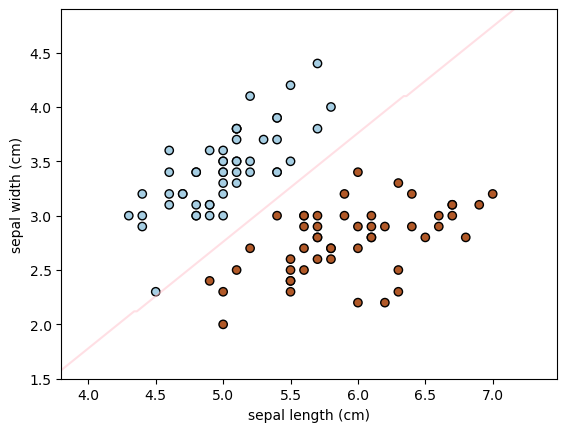

Equation of the line: y = -2.249599153108086x + -4.9417851974386195


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data
y = iris.target

class_0 = np.where(y == 0)
class_1 = np.where(y == 1)
X = np.concatenate((X[class_0], X[class_1]), axis=0)
y = np.concatenate((y[class_0], y[class_1]), axis=0)

X = X[:, :2] 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')  
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

svm = SVC(kernel='linear')
svm.fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors=['yellow', 'pink', 'orange'], levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])  

plt.show()

# Print the equation of the line
print(f"Equation of the line: y = {svm.coef_[0][1]}x + {svm.intercept_[0]}")